# Meta Aprendizaje - Shopping trends updated

<p>Click para acceder el conjunto de datos <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset">Shopping Trends Updated</a>.</p>

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="../shopping.jpg" alt="Una imagen" class="imagen-ajustada">

Esto es una continuaci&oacute;n de la pr&aacute;ctica 4, por lo cual el conjunto de datos utilizado es acerca de las preferencias de compra que tienen los clientes y recopila informaci&oacute;n esencial para la empresa, con el fin de mejorar la comprensi&oacute;n de su base de clientes.  

Se importan las librer&iacute;as necesarias.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Se importa el conjunto de datos a utilizar.

In [2]:
df = pd.read_csv('../shopping_trends_updated.csv')

# Limpieza de datos

Como ya se hizo un previo an&aacute;lisis exploratorio, iremos directamente a procesamiento de datos.

El nombre de las columnas tiene una notaci&oacute;n Camel Case, por lo cual lo pasaremos a Snake Case con el prop&oacute;sito de guardar un registro m&aacute;s limpio al momento de acceder a las columnas del dataframe.

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.map(lambda x:x.replace("-", "_").replace(" ","_"))
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

Hay que ver si hay datos duplicados, pero podemos ver que no hay.

In [4]:
df.duplicated().sum()

0

Checamos si no hay datos nulos en las columnas del conjunto de datos, viendo as&iacute; que no hay.

In [5]:
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
customer_id               0.0
age                       0.0
gender                    0.0
item_purchased            0.0
category                  0.0
purchase_amount_(usd)     0.0
location                  0.0
size                      0.0
color                     0.0
season                    0.0
review_rating             0.0
subscription_status       0.0
shipping_type             0.0
discount_applied          0.0
promo_code_used           0.0
previous_purchases        0.0
payment_method            0.0
frequency_of_purchases    0.0
dtype: float64



## Ingenier&iacute;a de caracter&iacute;sticas

Para un mejor procesamiento de datos, se ha decidido hacer ingenier&iacute;a de caracter&iacute;sticas para poder trabajar con los datos. En este caso vamos a tratar las variables n&uacute;mericas para que tengan un valor menor a 1 y sea f&aacute;cil trabajar con ellas.

In [6]:
from sklearn.preprocessing import RobustScaler

for col in ["age", "purchase_amount_(usd)", "review_rating", "previous_purchases"]:
    df.loc[:, [col]] = RobustScaler().fit_transform(df[[col]])
    
df[["age","purchase_amount_(usd)", "review_rating", "previous_purchases"]]    

,age,purchase_amount_(usd),review_rating,previous_purchases
0,0.423077,-0.166667,-0.461538,-0.44
1,-0.961538,0.095238,-0.461538,-0.92
2,0.230769,0.309524,-0.461538,-0.08
3,-0.884615,0.714286,-0.153846,0.96
4,0.038462,-0.261905,-0.769231,0.24
...,...,...,...,...
3895,-0.153846,-0.761905,0.384615,0.28
3896,0.307692,-0.261905,0.615385,0.64
3897,0.076923,-0.642857,-0.615385,-0.04
3898,0.000000,0.404762,0.076923,-0.04


En este caso, se transforman las variables categ&oacute;ricas en valores num&eacute;ricos del 0 al 1.

In [7]:
from sklearn.preprocessing import LabelEncoder

for col in ["gender", "subscription_status", "discount_applied", "promo_code_used"]:
    df.loc[:, [col]] = LabelEncoder().fit_transform(df[[col]])
    
df[["gender", "subscription_status", "discount_applied", "promo_code_used"]]


c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.p

,gender,subscription_status,discount_applied,promo_code_used
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
3895,0,0,0,0
3896,0,0,0,0
3897,0,0,0,0
3898,0,0,0,0


Por &uacute;ltimo se transforman las caracter&iacute;sticas categ&oacute;ricas en enteros para poder manejar los datos.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

for col in ["item_purchased", "category", "location", "size", "color", "season", "shipping_type", "payment_method"]:
    df.loc[:, [col]] = OrdinalEncoder().fit_transform(df[[col]])
    
df[["item_purchased", "category", "location", "size", "color", "season", "shipping_type", "payment_method"]]

,item_purchased,category,location,size,color,season,shipping_type,payment_method
0,2.0,1.0,16.0,0.0,7.0,3.0,1.0,5.0
1,23.0,1.0,18.0,0.0,12.0,3.0,1.0,1.0
2,11.0,1.0,20.0,2.0,12.0,1.0,2.0,2.0
3,14.0,2.0,38.0,1.0,12.0,1.0,3.0,4.0
4,2.0,1.0,36.0,1.0,21.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...
3895,9.0,1.0,45.0,0.0,21.0,2.0,0.0,5.0
3896,0.0,0.0,14.0,0.0,23.0,1.0,5.0,0.0
3897,1.0,0.0,29.0,0.0,8.0,1.0,4.0,5.0
3898,17.0,2.0,22.0,2.0,3.0,2.0,1.0,5.0


# Validaci&oacute;n Cruzada

En esta secci&oacute;n se manejara la validaci&oacute;n cruzada, primero separamos los datos en X e Y, donde X son los datos dependientes, adem&aacute;s de que Y es el dato independiente.

In [9]:
X = df[['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount_(usd)', 'location', 'size', 
       'color', 'season', 'review_rating', 'subscription_status', 'shipping_type','discount_applied', 
       'promo_code_used', 'previous_purchases','payment_method']]
y = df['frequency_of_purchases']
y

0       Fortnightly
1       Fortnightly
2            Weekly
3            Weekly
4          Annually
           ...     
3895         Weekly
3896      Bi-Weekly
3897      Quarterly
3898         Weekly
3899      Quarterly
Name: frequency_of_purchases, Length: 3900, dtype: object

Los datos se separan en datos de entrenamiento (80%) y los datos de prueba (20%).

In [10]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(3900, 17)
(3900,)


In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X)

Se utiliza Stratified Suffle Split para separar los datos.

In [12]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

Se separan los nombres de los modelos para que sea mas f&aacute;cil procesar los ciclos y se ejecute m&aacute;s r&aacute; para as&iacute; ahorrar tiempo.

In [13]:
nombres = [
    "Boosting",
    "Bagging",
    "AdaBoost",
    "Random Forest"
]
modelos = [
    GradientBoostingClassifier(n_estimators=10),
    BaggingClassifier(n_estimators=10),
    AdaBoostClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

Como prueba para ver si esta tomando bien los modelos, imprimo cada uno.

In [14]:
for nombre, modelo in zip(nombres, modelos):
    print(nombre)

Boosting
Bagging
AdaBoost
Random Forest


In [15]:
# Crear un DataFrame vacío para almacenar las métricas
metricas_df = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Sensibilidad', 'Especificidad'])

En esta secci&oacute;n es todo el proceso de impresi&oacute;n de matrices, su separaci&oacute;n de datos en entrenamiento y prueba gracias al Stratified Suffle Split y nos muestra los resultados respecto a la exactitud, sensibilidad y especificidad.

C:\Users\ages0\AppData\Local\Temp\ipykernel_9676\2510933961.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metricas_df = pd.concat([metricas_df, pd.DataFrame(metrics, index=[0])], ignore_index=True)


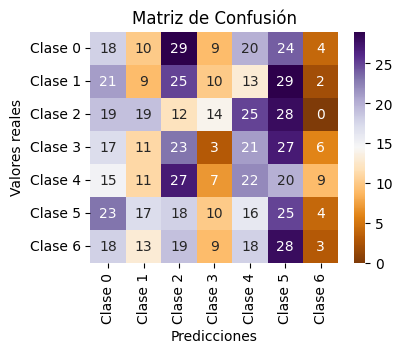

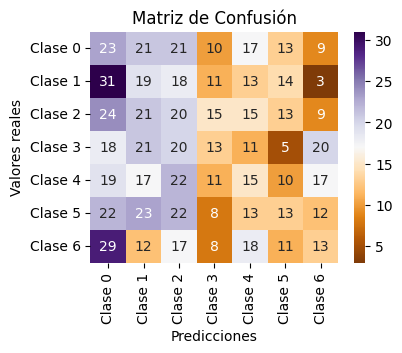

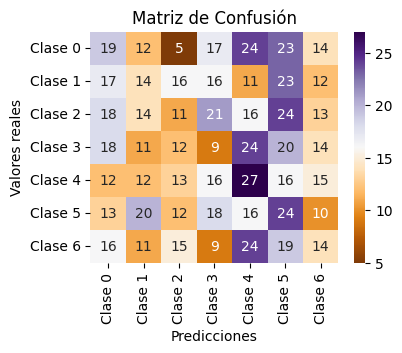

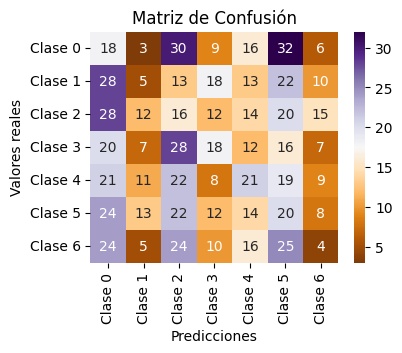

          Modelo  Exactitud  Sensibilidad  Especificidad
0       Boosting  13.461538     30.000000      64.285714
1        Bagging  14.000000     38.000000      52.272727
2       AdaBoost  14.846154     45.161290      61.290323
3  Random Forest  13.333333     15.151515      85.714286


In [16]:
from numpy import mean
for nombre, modelo in zip(nombres, modelos):
    
    sensibilidades = []
    especificidades = []
    scores = []
    for train_index, test_index in sss.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    
     # Se calcula la matriz de confusion 
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Se calcula la sensibilidad y la especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)
        
    # Agregamos métricas al DataFrame
    metrics = {
        'Modelo': nombre,
        'Exactitud': mean(scores) * 100,
        'Sensibilidad': sensibilidad * 100,
        'Especificidad': especificidad * 100
    }
    metricas_df = pd.concat([metricas_df, pd.DataFrame(metrics, index=[0])], ignore_index=True)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Heatmap de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuOr',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()

# Imprimimos la tabla de métricas
print(metricas_df)

Viendo estos resultados podemos ver que a todos los modelos les fue p&eacute;simo, as&iacute; que sacaremos un promedio para ver a cual de todos les fue mejor.

In [17]:
# Calculando el promedio de los modelos podemos ver a quien le fue mejor

metricas_df

,Modelo,Exactitud,Sensibilidad,Especificidad
0,Boosting,13.461538,30.000000,64.285714
1,Bagging,14.000000,38.000000,52.272727
2,AdaBoost,14.846154,45.161290,61.290323
3,Random Forest,13.333333,15.151515,85.714286


En esta secci&oacute;n se saca el promedio para ver a cual le fue mejor respecto a las 3 puntuaciones.

In [18]:
promedios = []
for row in range(len(metricas_df)):
    acumulado = metricas_df.iloc[row]['Exactitud'] + metricas_df.iloc[row]['Sensibilidad'] + metricas_df.iloc[row]['Especificidad']
    promedio = acumulado / len(metricas_df.columns) - 1
    print(metricas_df.iloc[row]['Modelo'], promedio)
    promedios.append(promedio)
promedios.sort(reverse=True)
print(promedios)

Boosting 25.93681318681319
Bagging 25.06818181818182
AdaBoost 29.324441687344912
Random Forest 27.549783549783548
[29.324441687344912, 27.549783549783548, 25.93681318681319, 25.06818181818182]


Por medio de la matriz de confusi&oacute;n podemos ver que a los datos no les fue bien con los modelos de clasificaci&oacute;n ya que tuvieron n&uacute;meros bajos respecto a la exactitud,  en sensibilidad tambien les fue mal pero en la parte de especificidad estuvieron entre los 60 y 70.  

# Segundo Objetivo

Se separan los nombres de los modelos, aqu&iacute; ya tomamos en cuenta los mejores modelos de la pr&aacute;ctica anterior y los actuales para ver que resultados nos dan.

In [19]:
nombres = [
    "RBF SVM",
    "Naive Bayes",
    "QDA",
    "Boosting",
    "Bagging",
    "AdaBoost",
    "Random Forest"
]
modelos = [
    SVC(gamma=2, C=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=5),
    BaggingClassifier(n_estimators=5),
    AdaBoostClassifier(n_estimators=5),
    RandomForestClassifier(max_depth=5, n_estimators=5, max_features=1)
]

Como prueba para ver si esta tomando bien los modelos, se imprime cada uno de los modelos tanto de la pr&aacute;ctica anterior como la actual.

In [20]:
for nombre, modelo in zip(nombres, modelos):
    print(nombre)

RBF SVM
Naive Bayes
QDA
Boosting
Bagging
AdaBoost
Random Forest


In [21]:
# Crear un DataFrame vacío para almacenar las métricas
metricas_df = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Sensibilidad', 'Especificidad'])

En esta secci&oacute;n es todo el proceso de impresi&oacute;n de matrices, su separaci&oacute;n de datos en entrenamiento y prueba gracias al Stratified Suffle Split y nos muestra los resultados respecto a la exactitud, sensibilidad y especificidad. Aqu&iacute; ya se toman en cuenta todos los modelos anteriormente mencionados.

C:\Users\ages0\AppData\Local\Temp\ipykernel_9676\2510933961.py:19: RuntimeWarning: invalid value encountered in scalar divide
  sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
C:\Users\ages0\AppData\Local\Temp\ipykernel_9676\2510933961.py:20: RuntimeWarning: invalid value encountered in scalar divide
  especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
C:\Users\ages0\AppData\Local\Temp\ipykernel_9676\2510933961.py:19: RuntimeWarning: invalid value encountered in scalar divide
  sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
C:\Users\ages0\AppData\Local\Temp\ipykernel_9676\2510933961.py:20: RuntimeWarning: invalid value encountered in scalar divide
  especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
C:\Users\ages0\AppData\Local\Temp\ipykernel_9676\2510933961.py:19: RuntimeWarning: invalid value encountered in scalar divide
  sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + co

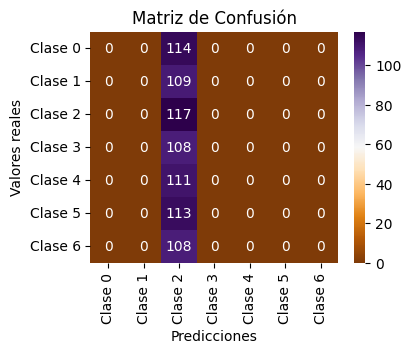

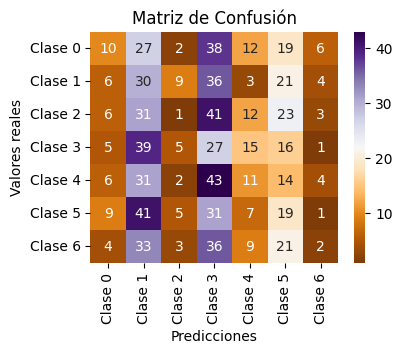

c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ages0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


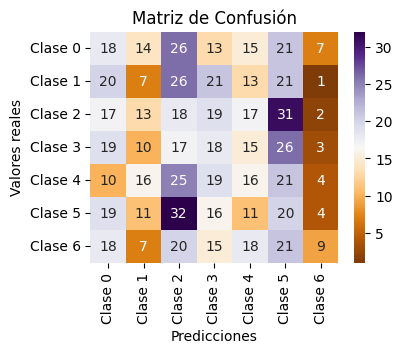

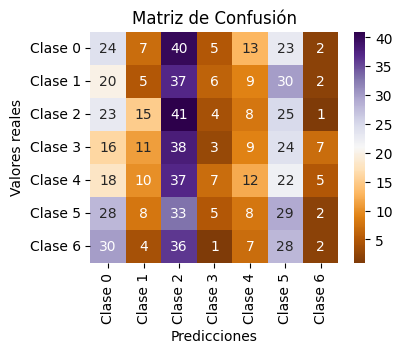

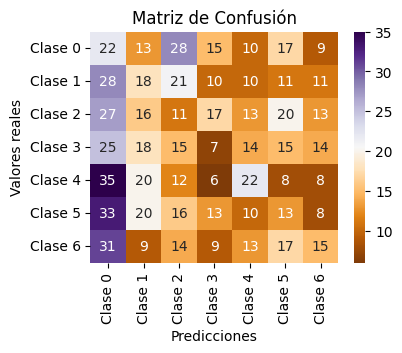

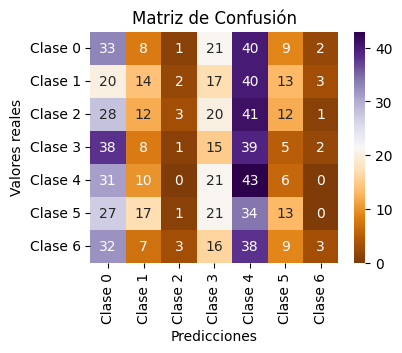

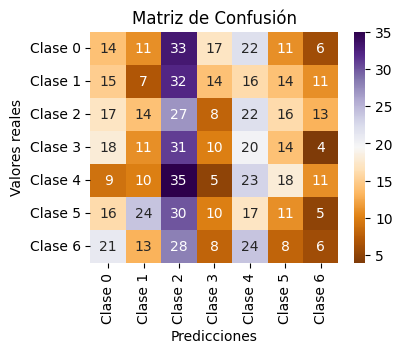

          Modelo  Exactitud  Sensibilidad  Especificidad
0        RBF SVM  15.025641           NaN            NaN
1    Naive Bayes  13.487179     83.333333      27.027027
2            QDA  15.358974     25.925926      56.250000
3       Boosting  13.948718     20.000000      77.419355
4        Bagging  13.564103     39.130435      62.857143
5       AdaBoost  14.692308     41.176471      80.487805
6  Random Forest  13.769231     31.818182      56.000000


In [22]:
from numpy import mean
for nombre, modelo in zip(nombres, modelos):
    
    sensibilidades = []
    especificidades = []
    scores = []
    for train_index, test_index in sss.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    
     # Se calcula la matriz de confusion 
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Se calcula la sensibilidad y la especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)
        
    # Agregamos métricas al DataFrame
    metrics = {
        'Modelo': nombre,
        'Exactitud': mean(scores) * 100,
        'Sensibilidad': sensibilidad * 100,
        'Especificidad': especificidad * 100
    }
    metricas_df = pd.concat([metricas_df, pd.DataFrame(metrics, index=[0])], ignore_index=True)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Heatmap de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuOr',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()

# Imprimimos la tabla de métricas
print(metricas_df)

Por los resultados dados podemos ver que al que no le fue tan bien es RBF SVM, ya que ni siquiera nos marca un rango de sensibilidad y especificidad, por lo cual por medio de experimentos veremos si puede tener alg&uacute;n valor.

Resultado Original

<table>
    <thead>
        <tr>
            <th>Modelos</th>
            <th>Exactitud</th>
            <th>Sensibilidad</th>
            <th>Especificidad</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>RBF SVM</td>
            <td>15.025641</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <td>Naive Bayes</td>
            <td>13.487179</td>
            <td>83.333333</td>
            <td>27.027027</td>
        </tr>
        <tr>
            <td>QDA</td>
            <td>15.358974</td>
            <td>25.925926</td>
            <td>56.250000</td>
        </tr>
        <tr>
        <tr>
            <td>Boosting</td>
            <td>13.948718</td>
            <td>20.000000</td>
            <td>77.419355</td>
        </tr>   
        <tr>
            <td>Bagging</td>             
            <td>13.564103</td>
            <td>39.130435</td>
            <td>62.857143</td>
        </tr>   
        <tr>   
            <td>AdaBoost</td>
            <td>14.692308</td>
            <td>41.176471</td>
            <td>80.487805</td>
        </tr>   
        <tr>     
            <td>Random Forest</td>
            <td>13.769231</td>
            <td>31.818182</td>
            <td>56.000000</td>
        </tr>   
        </tr>
    </tbody>
</table>

Experimento 1

Para el primer experimento se modificar&aacute; el SVM poniendo el par&aacute;metro Gamma en 4 para ver si hay alg&uacute;n cambio ya que entre mas pequeño sea el par&aacute;etro significa que est&aacute; m&aacute;s lejos y los valores altos significa que est&aacute;n m&aacute;s cerca. Adem&aacute;s tambi&eacute;n se cambio los estimadores a 10 en Boosting, Bagging y Random Forest para ver si hay un cambio.

<table>
    <thead>
        <tr>
            <th>Modelos</th>
            <th>Exactitud</th>
            <th>Sensibilidad</th>
            <th>Especificidad</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>RBF SVM</b></td>
            <td><b>15.00000</b></td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <td>Naive Bayes</td>
            <td>13.487179</td>
            <td>83.333333</td>
            <td>27.027027</td>
        </tr>
        <tr>
            <td>QDA</td>
            <td>15.358974</td>
            <td>25.925926</td>
            <td>56.250000</td>
        </tr>
        <tr>
        <tr>
            <td><b>Boosting</b></td>
            <td><b>13.461538</b></td>
            <td><b>30.000000</b></td>
            <td><b>64.285714</b></td>
        </tr>   
        <tr>
            <td><b>Bagging</b></td>
            <td><b>14.179487</b></td>
            <td><b>28.888889</b></td>
            <td><b>60.000000</b></td>
        </tr>   
        <tr>
            <td><b>AdaBoost</b></td>
            <td><b>15.205128</b></td>
            <td><b>42.424242</b></td>
            <td><b>75.000000</b></td>
        </tr>   
        <tr>
            <td><b>Random Forest</b></td>
            <td><b>14.128205</b></td>
            <td><b>52.941176</b></td>
            <td><b>63.414634</b></td>
        </tr>   
        </tr>
    </tbody>
</table>

Por lo que vemos la exactitud bajo un poco en RBF SVM pero no hubo mucho cambio, por otro lado vemos que el modelo Boosting, Bagging, Adaboost y Random Forest se vieron afectados, Boosting en general baj&oacute;, Bagging subi&oacute; en exactitud pero baj&oacute; en las demas, Adaboost baj&oacute; en sensibilidad pero subi&oacute; en las otras dos y por &uacute;ltimo Random Forest baj&oacute; en especificidad pero subi&oacute; en los demas.
Para el siguiente experimento aumentaremos en SVM Gamma a 20 y C a 10,  los estimadores de los otros modelos los subiremos a 20 para ver en que afecta, y tambien sirve para ver si SVM cambio su valor de NaN a un n&acute;mero.

Experimento 2

Aqui aumentamos el gamma a 20 para ver si estando m&aacute;s cerca aumentaba el valor, adem&aacute;s que en la parte de C aumentamos a 10 para ver si con un margen alto hay alg&uacute;n cambio, en los dem&aacute;s modelos se utilizaron 10 estimadores.

<table>
    <thead>
        <tr>
            <th>Modelos</th>
            <th>Exactitud</th>
            <th>Sensibilidad</th>
            <th>Especificidad</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>RBF SVM</td>
            <td>15.00000</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <td>Naive Bayes</td>
            <td>13.487179</td>
            <td>83.333333</td>
            <td>27.027027</td>
        </tr>
        <tr>
            <td>QDA</td>
            <td>15.358974</td>
            <td>25.925926</td>
            <td>56.250000</td>
        </tr>
        <tr>
        <tr>
            <td><b>Boosting</b></td>
            <td><b>13.384615</b></td>
            <td><b>33.333333</b></td>
            <td><b>44.827586</b></td>
        </tr>   
        <tr>
            <td><b>Bagging</b></td>
            <td><b>14.358974</b></td>
            <td><b>46.511628 </b></td>
            <td><b>66.666667</b></td>
        </tr>   
        <tr>
            <td><b>AdaBoost</b></td>
            <td><b>14.333333</b></td>
            <td><b>72.413793</b></td>
            <td><b>39.285714</b></td>
        </tr>   
        <tr>
            <td><b>Random Forest</td>
            <td><b>12.641026</b></td>
            <td><b>35.294118</b></td>
            <td><b>54.838710</b></td>
        </tr>   
        </tr>
    </tbody>
</table>

Con este cambio RBF SVM no cambio su valor, Boosting subi&oacute; en sensibilidad pero baj&oacute; en los demas, Bagging aumento en todos, Adaboost subi&oacute; en sensibilidad pero baj&oacute; en los demas, por &uacute;ltimo Random Forest baj&oacute; en todos los aspectos. Por lo cual en el siguiente experimento aumentaremos mucho los valores para ver el cambio.

Experimento 3

Para el siguiente experimento aumentaremos en SVM Gamma y C a 30, tambien aumentaremos los estimadores de los dem&aacute;s modelos a 30 para ver como le va a cada uno.

<table>
    <thead>
        <tr>
            <th>Modelos</th>
            <th>Exactitud</th>
            <th>Sensibilidad</th>
            <th>Especificidad</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>RBF SVM</td>
            <td>15.00000</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <td>Naive Bayes</td>
            <td>13.487179</td>
            <td>83.333333</td>
            <td>27.027027</td>
        </tr>
        <tr>
            <td>QDA</td>
            <td>15.358974</td>
            <td>25.925926</td>
            <td>56.250000</td>
        </tr>
        <tr>
        <tr>
            <td><b>Boosting</b></td>
            <td><b>13.333333</b></td>
            <td><b>43.750000</b></td>
            <td><b>58.333333</b></td>
        </tr>   
        <tr>
            <td><b>Bagging</b></td>
            <td><b>13.897436 </b></td>
            <td><b>37.837838 </b></td>
            <td><b>61.538462</b></td>
        </tr>   
        <tr>
            <td><b>AdaBoost</b></td>
            <td><b>14.820513</b></td>
            <td><b>59.259259</b></td>
            <td><b>51.724138</b></td>
        </tr>   
        <tr>
            <td><b>Random Forest</td>
            <td><b>14.205128</b></td>
            <td><b>25.806452</b></td>
            <td><b>67.741935</b></td>
        </tr>   
        </tr>
    </tbody>
</table>

Con este cambio SVM sigue sin cambiar sus valores, por otro lado Boosting baj&oacute; en exactitud pero subi&oacute; en lo dem&aacute;s, Bagging baj&oacute; en todo, Adaboost baj&oacute; en sensibilidad pero subi&oacute; en lo demas, por &uacute;ltimo Random Forest baj&oacute; en sensibilidad pero subi&oacute; en lo demas.
Lo que se ha utilizado no ha servido de mucho, asi que veamos el &uacute;ltimo experimento que va a consistir en aumentar los estimadores a 100 para ver la respuesta.

Experimento 4

<table>
    <thead>
        <tr>
            <th>Modelos</th>
            <th>Exactitud</th>
            <th>Sensibilidad</th>
            <th>Especificidad</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>RBF SVM</td>
            <td>15.00000</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <td>Naive Bayes</td>
            <td>13.487179</td>
            <td>83.333333</td>
            <td>27.027027</td>
        </tr>
        <tr>
            <td>QDA</td>
            <td>15.358974</td>
            <td>25.925926</td>
            <td>56.250000</td>
        </tr>
        <tr>
        <tr>
            <td><b>Boosting</b></td>
            <td><b>12.589744</b></td>
            <td><b>34.482759</b></td>
            <td><b>39.285714</b></td>
        </tr>   
        <tr>
            <td><b>Bagging</b></td>
            <td><b>13.743590 </b></td>
            <td><b>38.888889 </b></td>
            <td><b>52.941176</b></td>
        </tr>   
        <tr>
            <td><b>AdaBoost</b></td>
            <td><b>14.256410</b></td>
            <td><b>47.368421</b></td>
            <td><b>58.620690</b></td>
        </tr>   
        <tr>
            <td><b>Random Forest</td>
            <td><b>14.333333</b></td>
            <td><b>34.210526</b></td>
            <td><b>59.259259</b></td>
        </tr>   
        </tr>
    </tbody>
</table>

Por lo que vemos, SVM no cambio en nada aunque se cambiaran los valores de Gamma y C, Boosting baj&oacute; en todo, Bagging subi&oacute; en sensibilidad pero baj&oacute; en lo dem&aacute;s, AdaBoost baj&oacute; en sensibilidad pero subi&oacute; en todo lo demas, por &uacute;ltimo Random Forest subi&oacute; en especificidad pero baj&oacute; en lo demas.

Como conclusi&oacute;n puedo decir que no encontre la forma de obtener valores en las casillas donde marcaba NaN, no se si se debe a mi forma de procesar los datos, si ocupaba aumentar a&uacute;n m&aacute;s los datos o que fueran menos, pero no se puedo cambiar el valor de NaN. Por otro lado, haciendo estos experimentos al inicio pens&acute; que Bagging conforme fueran aumentando los estimadores ir&iacute;a siendo mejor pero al tercer experimento me di cuenta que mi hip&oacute;tesis estaba errada, ya que siempre estaba cambiando dependiendo que valores se le daba. 